# BETA DATABASE
Notebook to explore and understand the data on [enchmark](http://bci.med.tsinghua.edu.cn/download.html).

This will help studies on BCI EEG filtering and data manipulation.

In [5]:
import numpy as np
from scipy.io import loadmat
from scipy.fft import fft, ifft, fftfreq
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from mne import create_info
from mne.channels import make_standard_montage
from mne.io import RawArray

# Extracting and parsing data

In [12]:
class Dataset(data_path):
    _num_subjects = 35
    _mat_files = [data_paths.joinpath(f"S{i}.mat") for i in range(1, _num_subjects + 1)]
    _num_channels = 64
    _visual_cue = 0.5

    def get_num_subjects(self):
        return self._num_subjects

    def get_subject_eeg_data(self, subject):

        print(self._mat_files[subject - 1])
        s = loadmat(str(self._mat_files[subject - 1]))
        return s["data"][0, 0][0]

NameError: name 'data_path' is not defined

In [11]:
data = Dataset()

eeg = data.get_subject_eeg_data(4)
eeg.shape

AttributeError: 'Dataset' object has no attribute '_mat_files'

In [112]:
reshaped = np.reshape(eeg, newshape=(-1, 64, eeg.shape[1]))

In [114]:
reshaped.shape

(160, 64, 750)

In [35]:
s1 = loadmat(str(mat_files[3]))
s1_array = s1["data"][0, 0]

eeg_data = s1_array[0]
complementary_data = s1_array[1]

In [61]:
s1["data"].shape

(1, 1)

In [62]:
data = np.transpose(s1["data"][0], axes=(2, 3, 0, 1))

ValueError: axes don't match array

In [32]:
eeg_data.shape

(64, 750, 4, 40)

In [23]:
complementary_data[0, 0][4][0]

array([ 8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6,
       10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8,
       13. , 13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. ,
       15.2, 15.4, 15.6, 15.8,  8. ,  8.2,  8.4])

In [35]:
signal_length = 0.4
sample_length = sampling_rate * signal_length
total_delay = visual_latency + visual_cue
delay_sample_point = round(total_delay * sampling_rate)
# sample_interval = (delay_sample_point+1):delay_sample_point+sample_length

In [37]:
sample_length

100.0

In [66]:
# (channel, time_point, block, condition)
# time point at a 250 Hz samplng rate.
# freqs. 8~16, stpe0.2 Hz
plot_data = eeg_data[
    61, delay_sample_point : int(delay_sample_point + sample_length), 0, 37
]

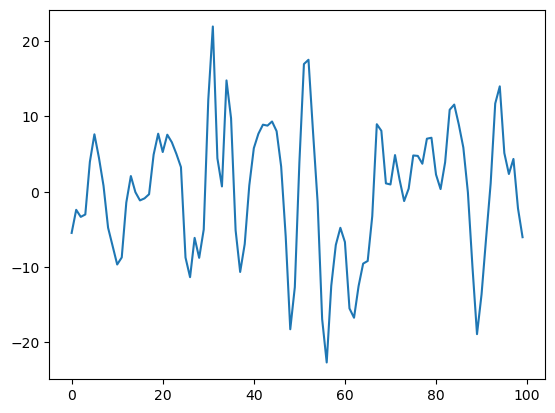

In [67]:
plt.plot(plot_data)

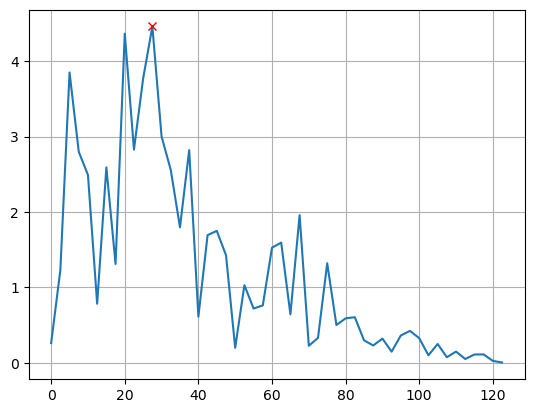

27.5


In [68]:
# Number of sample points
N = plot_data.shape[0]
T = 1 / sampling_rate
yf = fft(plot_data)
xf = fftfreq(N, T)[: N // 2]
yf_abs = 2.0 / N * np.abs(yf[0 : N // 2])
x_max = np.argmax(yf_abs)
plt.plot(xf, yf_abs)
plt.plot(xf[x_max], yf_abs[x_max], "rx")
plt.grid()
plt.show()
print(xf[x_max])

In [70]:
# Preprocessing 
total_delay=visual_latency+visual_cue; # Total undesired signal length in seconds
delay_sample_point=round(total_delay*sampling_rate); # # of data points correspond for undesired signal length
sample_interval = (delay_sample_point+1):delay_sample_point+sample_length; # Extract desired signal
channels=[48 54 55 56 57 58 61 62 63];# Indexes of 9 channels: (Pz, PO3, PO5, PO4, PO6, POz, O1, Oz, and O2)

SyntaxError: invalid syntax (1219325137.py, line 4)

In [74]:
signal_length = 0.4
sample_length = sampling_rate * signal_length
total_delay = visual_latency + visual_cue
delay_sample_point = round(total_delay * sampling_rate)
channels = [47, 53, 54, 55, 56, 57, 60, 61, 62]
# Indexes of 9 channels: (Pz, PO3, PO5, PO4, PO6, POz, O1, Oz, and O2)
# sample_interval = (delay_sample_point+1):delay_sample_point+sample_length

In [ ]:
s1 = loadmat(str(mat_files[0]))
s1_array = s1["data"][0, 0]

eeg_data = s1_array[0]
complementary_data = s1_array[1]